# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com).

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

### Import Libraries

- Import the usual libraries for pandas and plotting. You can import sklearn later on.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

### Get the Data

- Use pandas to read loan_data.csv as a dataframe called loans.

In [4]:
df = pd.read_csv('loan_data.csv')
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

- Check out the info(), head(), and describe() methods on loans.

In [10]:
df.info()
df.isnull().sum()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


(9578, 14)

In [7]:
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

# Exploratory Data Analysis

Let's do some data visualization! Don't worry about the colors matching, just worry about getting the main idea of the plot.

- Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

- *hint* You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()

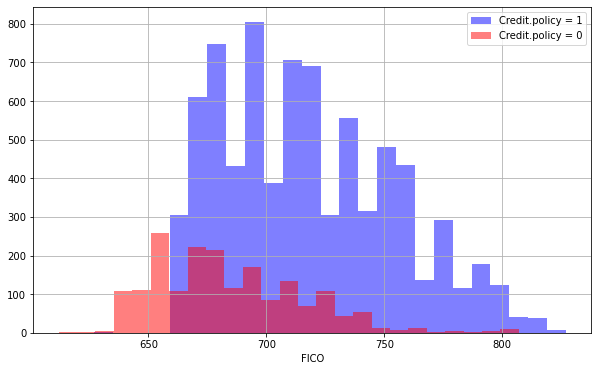

In [131]:
plt.figure(figsize=(10,6))
df[df.iloc[:,0]==1]['fico'].hist(label= 'Credit.policy = 1', bins=25, ls='dashed', alpha = 0.5, lw=5, color= 'b')
df[df.iloc[:,0]==0]['fico'].hist(label= 'Credit.policy = 0', bins=25, ls='dashed', alpha = 0.5, lw=5, color= 'r')
plt.xlabel('FICO')
plt.legend()


- Create a similar figure, except this time select by the not.fully.paid column.

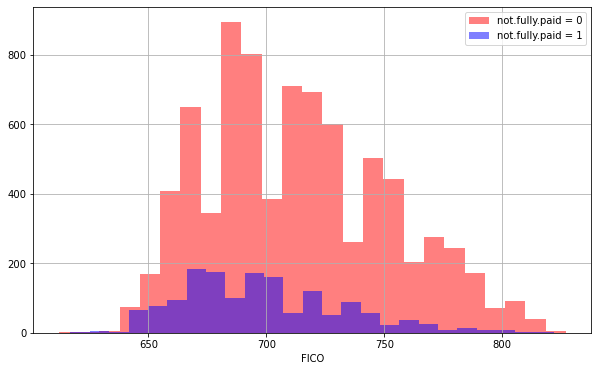

In [132]:
plt.figure(figsize=(10,6))
df[df.iloc[:,13]==0]['fico'].hist(label= 'not.fully.paid = 0', bins=25, ls='dashed', alpha = 0.5, lw=5, color= 'r')
df[df.iloc[:,13]==1]['fico'].hist(label= 'not.fully.paid = 1', bins=25, ls='dashed', alpha = 0.5, lw=5, color= 'b')
plt.xlabel('FICO')
plt.legend()

- Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'all_other'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'small_business'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'educational')])

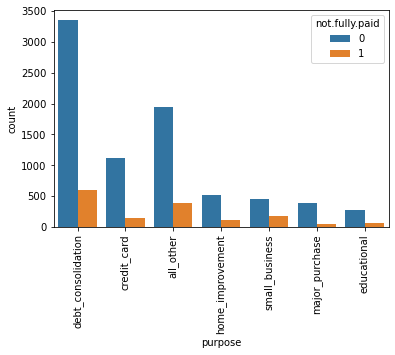

In [58]:
sns.countplot(x= df['purpose'], hue = df['not.fully.paid'])
plt.xticks(rotation=90)

- Let's see the trend between FICO score and interest rate. Recreate the following jointplot.

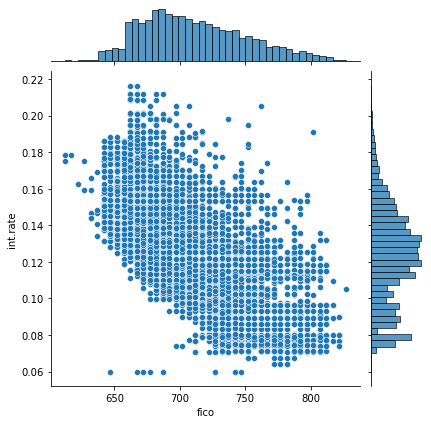

In [65]:
sns.jointplot(data=df, x= 'fico', y= 'int.rate')

- Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.

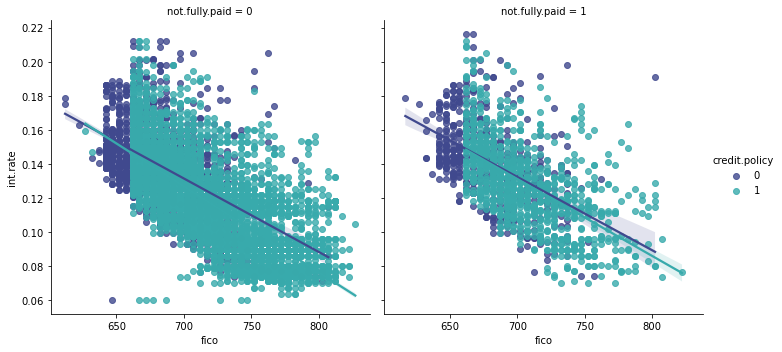

In [74]:
sns.lmplot(data=df, x ='fico' , y='int.rate', hue='credit.policy', col='not.fully.paid',palette = 'mako')

### Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

- Check loans.info() again.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

- Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.

In [78]:
cat_feats = ['purpose']

- Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.

In [80]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [173]:
final_data.shape

(9578, 19)

### Train Test Split

Now its time to split our data into a training set and a testing set!

- Use sklearn to split your data into a training set and a testing set as we've done in the past.

In [180]:
#Dividing features and target variable:
x = final_data.iloc[:,0:-1]
y = final_data.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.25, random_state=45)
##Validating the split:
len(x),len(x_train),len(x_test),len(y_train),len(y_test)

(9578, 7183, 2395, 7183, 2395)

### Training a Decision Tree Model

Let's start by training a single decision tree first!

- Import DecisionTreeClassifier

In [182]:
from sklearn.tree import DecisionTreeClassifier

- Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [183]:
# create decisiontreeclassifier object
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [184]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

### Predictions and Evaluation of Decision Tree
- Create predictions from the test set and create a classification report and a confusion matrix.

In [185]:
pred = dtree.predict(x_test)
pred
list(zip(pred, y_test))

[(1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 

In [186]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2230
           1       0.43      0.44      0.43       165

    accuracy                           0.92      2395
   macro avg       0.69      0.70      0.70      2395
weighted avg       0.92      0.92      0.92      2395



In [187]:
confusion_matrix(y_test,pred)

array([[2134,   96],
       [  93,   72]], dtype=int64)

### Training the Random Forest model

Now its time to train our model!

- Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [188]:
rf = RandomForestClassifier(n_jobs =2, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=42)

### Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

- Predict the class of not.fully.paid for the X_test data.

In [189]:
pred_rf = rf.predict(x_test)
#list(zip(pred_rf, y_test))

- Now create a classification report from the results. Do you get anything strange or some sort of warning?

### RF classification report

In [190]:
print(classification_report(y_test, pred_rf))
##no warnings

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2230
           1       0.78      0.25      0.38       165

    accuracy                           0.94      2395
   macro avg       0.86      0.62      0.68      2395
weighted avg       0.94      0.94      0.93      2395



### D-tree classification report

                 precision  recall   f1-score   support

           0       0.96      0.96       0.96      2230
           1       0.42      0.41       0.41       165

    accuracy                            0.92      2395
    macro avg       0.69      0.68      0.68      2395
    weighted avg    0.92      0.92      0.92      2395

- Show the Confusion Matrix for the predictions.

In [193]:
confusion_matrix(y_test,pred_rf)

array([[2218,   12],
       [ 123,   42]], dtype=int64)

- What performed better the random forest or the decision tree?

In [36]:
##Random forest performed better as it has higher accuracy(i.e. higher F1 score) compared to decision tree shown in their respective classification reports.